# Exercise 3

The exercise focuses on backpropagation. We begin with pen and paper tasks followed by code tasks which build on the previous exercise.


## Pen and Paper Tasks

Perform a forward and backward pass to calculate the gradients for the weights $w_0, w_1, w_2, w_s$ in the following MLP. Each node represents one unit with a weight $w_i, i \in \{0, 1, 2\}$ connecting it to the previous node. The connection from unit 0 to unit 2 is called a __skip connection__, which means unit 2 receives input from two sources and thus has an additional weight $w_s$. The weighted inputs are added before the nonlinearity is applied.

**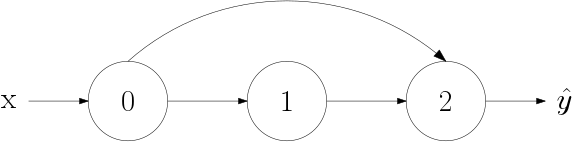**

We assume that we want to solve a regression task. We use an L1-loss $L(\hat{y}, y) = |y - \hat{y}|$

The nonlinearities for the first two units are rectified linear functions/units (ReLU): $g_0(z) = g_1(z) = \begin{cases} 0, z<0\\ z, else \end{cases}$.

We do not use a nonlinearity for the second unit: $g_2(z_2) = z_2$.

**Note:** We use the notation of the Deep Learning book here, i.e. $z = Wx+b$. If you attended the Machine Learning course, you might be used to the different notation used in the Bishop Book, where $z$ denotes the value after applying the activation function. Here, $z$ is the value before applying the activation function.


**Perform the backpropagation algorithm for the above network** (2 points)

First perform the forward pass, followed by the backward pass to obtain gradients for the weights $w_0, w_1, w_2, w_s$.

You can paste a scanned image of your solution to this exercise on paper into this Jupyter notebook. Or if you want to make it easier for the tutors to correct, you can also answer in Latex code in this cell. Some example Latex code is entered here to help you get started.

Please assign equations/values to variables and reuse them later when possible to make your solution more readable.

#### START TODO ####

__Forward Pass:__

\begin{align*}
    \hat{y} &=& g_2(z_2) \\
    z_2 &=& w_2 h_1 + w_sh_0 \\
    h_1 &=& g_1 (z_1) \\
    z_1 &=& w_1 h_0\\
    h_0 &=& g_0 (z_0) \\
    z_0 &=& w_0 x
\end{align*}  


__Backward Pass:__


\begin{align*}
    \frac{\partial L}{\partial \hat{y}} =  \begin{cases} 1 \quad if \quad\hat{y} > y\\ -1 \quad else\end{cases}\\
    \frac{\partial L}{\partial z_2} &= \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z_2}
    \\
    \frac{\partial L}{\partial h_1} =\frac{\partial L}{\partial z_2}\cdot\frac{\partial z_2}{\partial h_1} &= \frac{\partial L}{\partial z_2} \cdot w_2 \\
    \frac{\partial L}{\partial z_1} &= \frac{\partial L}{\partial h_1} \cdot \frac{\partial h_1}{\partial z_1} \\
    \frac{\partial L}{\partial h_0} &= \frac{\partial L}{\partial z_1} \cdot \frac{\partial z_1}{\partial h_0}   + \frac{\partial L}{\partial z_2} \cdot \frac{\partial z_2}{\partial h_0} \\ 
    \frac{\partial L}{\partial z_0} &= \frac{\partial L}{\partial h_0} \cdot \frac{\partial h_0}{\partial z_0} \\
    \frac{\partial L}{\partial w_2} &= \frac{\partial L}{\partial z_2} \cdot \frac{\partial z_2}{\partial w_2} \\
    \frac{\partial L}{\partial w_s} &= \frac{\partial L}{\partial z_2} \cdot \frac{\partial z_2}{\partial w_s} \\
    \frac{\partial L}{\partial w_1} &= \frac{\partial L}{\partial z_1} \cdot \frac{\partial z_1}{\partial w_1} \\
\end{align*}   


#### END TODO ####


**What difference does the skip connection make when propagating back the error?** (1 point)

#### START TODO ####
This solves the vanishing gradient problem. As we progress through the network, the gradients decrease. But when we do a skip connection we preserve the gradient.
#### END TODO ####


**Calculate the gradients for the given datapoint and the given initial weights (calculating the gradients requires to calculate a forward pass first). Also calculate the weights and the loss after one gradient descent step.** (3 points)

$$(x_1, y_1) = (1, -3) \\
w_0 = w_1 = w_2 = w_s = 0.5 \\
Learning Rate = 1 \\  $$

#### START TODO ####
__Forward Pass:__

\begin{align*}
    \hat{y} &= g_2(z_2) &=& 0.375 \\
    z_2 &= w_2 h_1 + w_s h_0= 0.5\cdot0.25 + 0.5\cdot0.5 &=& 0.375 \\
    h_1 &= g_1 (z_1) &=& 0.25\\
    z_1 &= w_1 h_0 = 0.5\cdot0.5 &=& 0.25\\
    h_0 &= g_0 (z_0) &=& 0.5\\
    z_0 &= w_0 x &=& 0.5
\end{align*}  


__Backward Pass:__


\begin{align*}
    \frac{\partial L}{\partial \hat{y}} =  \begin{cases} 1 \quad if \quad\hat{y} > y\\ -1 \quad else\end{cases} &=& 1\\
    \frac{\partial L}{\partial z_2} &= \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z_2} =1\cdot 1 &=& 1
    \\
    \frac{\partial L}{\partial h_1} &= \frac{\partial L}{\partial z_2} \cdot w_2 &=& 0.5\\
    \frac{\partial L}{\partial z_1} &= \frac{\partial L}{\partial h_1} \cdot \frac{\partial h_1}{\partial z_1} = 0.5 \cdot 1&=& 0.5\\
    \frac{\partial L}{\partial h_0} &= \frac{\partial L}{\partial z_1} \cdot \frac{\partial z_1}{\partial h_0}   + \frac{\partial L}{\partial z_2} \cdot \frac{\partial z_2}{\partial h_0} =  0.5 +0.25 &=&0.75 \\ 
    \frac{\partial L}{\partial z_0} &= \frac{\partial L}{\partial h_0} \cdot \frac{\partial h_0}{\partial z_0} &=&  0.75\cdot 1\\
    \frac{\partial L}{\partial w_2} &= \frac{\partial L}{\partial z_2} \cdot \frac{\partial z_2}{\partial w_2} &=& 0.25\\
    \frac{\partial L}{\partial w_s} &= \frac{\partial L}{\partial z_2} \cdot \frac{\partial z_2}{\partial w_s} &=& 0.5\\
    \frac{\partial L}{\partial w_1} &= \frac{\partial L}{\partial z_1} \cdot \frac{\partial z_1}{\partial w_1} = 0.5\cdot 0.5 &=& 0.25\\
    \frac{\partial L}{\partial w_0} &= \frac{\partial L}{\partial z_1} \cdot \frac{\partial z_1}{\partial w_0} = 0.75\cdot 1 &=& 0.75\\
\end{align*}   

__One Gradient Descent Step:__
\begin{align*}
    (x_1,y_1) &=& (1,3)  \\
    w_0 = w_1 = w_2 = w_s &=& 0.5 \\
    Learning Rate &=& 1 \\  
    w_2 = w_2 - \lambda \cdot \frac{\partial L}{\partial w_2}= 0.5 - 1\cdot 0.25 &=& 0.25 \\
    w_1 = w_1 - \lambda \cdot \frac{\partial L}{\partial w_1}= 0.5 - 1\cdot 0.25 &=& 0.25 \\
    w_s = w_s - \lambda \cdot \frac{\partial L}{\partial w_s}= 0.5 - 1\cdot 0.5 &=& 0 \\
    w_0 = w_0 - \lambda \cdot \frac{\partial L}{\partial w_0}= 0.5 - 1\cdot 0.75 &=& -0.25 \\
\end{align*}  


__Forward Pass:__
\begin{align*}
    L(y,\hat{y}) &=& 3 \\
    \hat{y} = g_2(z_2) &=& 0 \\
    z_2 = w_2 h_1 + w_s h_0= 0.25\cdot0 + 0 &=& 0 \\
    h_1 &=& 0\\
    z_1 = w_1 h_0 = 0.25\cdot0 &=& 0.\\
    h_0 &=& 0\\
    z_0 = -0.25 \cdot 0 &=& -0.25
\end{align*}
#### END TODO ####





## Coding Tasks

The coding tasks build on the previous exercise. We complete implementing a small feedforward neural network and then use backprop to obtain gradients and update the weights of the network for the XOR dataset as last time. We provide code for structure and utility and you have to **fill in the TODO-gaps**.

In [318]:
# Some imports used in the code below
from typing import Iterable, List, Optional, Tuple  # type annotations

import numpy as np  # linear algebra
import matplotlib.pyplot as plt  # plotting
import scipy.optimize  # gradient check

In the previous exercise, you used the **Parameter** and **Module** classes and implemented their forward passes. This time you will implement their backward passes.

*Note:* An additional utility module is used to check the correctness of your implementation by approximating *backward* with [finite difference approximations](https://en.wikipedia.org/wiki/Finite_difference#Relation_with_derivatives)  of *forward*. All modules operate on batches of samples. E.g. the input shape of `Linear.forward` is `(batch_size, feature_shape, 1)` (we will use the last dimension in future exercises).

In [319]:
class Parameter:
    """A trainable parameter.

    This class not only stores the value of the parameter (self.data) but also tensors/
    properties associated with it, such as the gradient (self.grad) of the current backward
    pass.
    """

    def __init__(self, data: np.ndarray, grad: Optional[np.ndarray] = None, name=None):
        self.data = data  # type: np.ndarray
        self.grad = grad  # type: Optional[np.ndarray]
        self.name = name  # type: Optional[str]
        self.state_dict = dict()  # dict to store additional, optional information
        
        
class Module:
    """The base class all network modules must inherit from."""

    def __init__(self):
        # Cache of the input of the forward pass.
        # We need it during the backward pass in most layers,
        #  e.g., to compute the gradient w.r.t to the weights.
        self.input_cache = None

    def __call__(self, *args) -> np.ndarray:
        """Alias for forward, convenience function."""
        return self.forward(*args)

    def forward(self, *args) -> np.ndarray:
        """Compute the forward pass through the module.

        Args:
           args: The inputs, e.g., the output of the previous layer.
        """
        raise NotImplementedError

    def backward(self, grad: np.ndarray) -> np.ndarray:
        """Compute the backward pass through the module.

        This method computes the gradients with respect to the trainable
        parameters and with respect to the first input.
        If the module has trainable parameters, this method needs to update
        the respective parameter.grad property.

        Args:
            grad: The gradient of the following layer.

        Returns:
            The gradient with respect to the first input argument. In general
            it might be useful to return the gradients w.r.t. to all inputs, we
            omit this here to keep things simple.
        """
        raise NotImplementedError

    def parameters(self) -> List[Parameter]:
        """Return the module parameters."""
        return []  # default to empty list

    def check_gradients(self, input_args: Tuple[np.ndarray]):
        """Verify the implementation of the gradients.

        This includes the gradient with respect to the input as well as the
        gradients w.r.t. the parameters if the module contains any.

        As the scipy grad check only works on scalar functions, we compute
        the sum over the output to obtain a scalar.
        """
        assert isinstance(input_args, tuple), (
            "input_args must be a tuple but is {}".format(type(input_args)))
        TOLERANCE = 1e-6
        self.check_gradients_wrt_input(input_args, TOLERANCE)
        self.check_gradients_wrt_params(input_args, TOLERANCE)

    def _zero_grad(self):
        """(Re-) intialize the param's grads to 0. Helper for grad checking."""
        for p in self.parameters():
            p.grad = np.zeros_like(p.data)

    def check_gradients_wrt_input(self, input_args: Tuple[np.ndarray],
                                  tolerance: float):
        """Verify the implementation of the module's gradient w.r.t. input."""

        def output_given_input(x: np.ndarray):
            """Wrap self.forward for scipy.optimize.check_grad."""
            # we only compute the gradient w.r.t. to the first input arg.
            args = (x.reshape(input_args[0].shape),) + input_args[1:]
            return np.sum(self.forward(*args))

        def grad_given_input(x: np.ndarray):
            """Wrap self.backward for scipy.optimize.check_grad."""
            self._zero_grad()
            # run self.forward to store the new input
            args = (x.reshape(input_args[0].shape),) + input_args[1:]
            out = self.forward(*args)
            # compute the gradient w.r.t. to the input
            return np.ravel(self.backward(np.ones_like(out)))

        error = scipy.optimize.check_grad(
            output_given_input, grad_given_input, np.ravel(input_args[0]))
        num_outputs = np.prod(self.forward(*input_args).shape)
        if np.squeeze(error) / num_outputs > tolerance:
            raise RuntimeError("Check of gradient w.r.t. to input for {} failed."
                               "Error {:.4E} > {:.4E}."
                               .format(self, np.squeeze(error), tolerance))

    def check_gradients_wrt_params(self, input_args: Tuple[np.ndarray],
                                   tolerance: float):
        """Verify the implementation of the module's gradient w.r.t. params."""
        for param in self.parameters():
            def output_given_params(new_param: np.ndarray):
                """Wrap self.forward, change the parameters to new_param."""
                param.data = new_param.reshape(param.data.shape)
                return np.sum(self.forward(*input_args))

            def grad_given_params(new_param: np.ndarray):
                self._zero_grad()
                param.data = new_param.reshape(param.data.shape)
                out = self.forward(*input_args)
                # compute the gradient w.r.t. to param
                self.backward(np.ones_like(out))
                return np.ravel(param.grad)
            # flatten the param as scipy can only handle 1D params
            param_init = np.ravel(np.copy(param.data))
            error = scipy.optimize.check_grad(output_given_params,
                                              grad_given_params,
                                              param_init)
            num_outputs = np.prod(self.forward(*input_args).shape)
            if np.squeeze(error) / num_outputs > tolerance:
                raise RuntimeError("Check of gradient w.r.t. to param '{}' for"
                                   "{} failed. Error {:.4E} > {:.4E}."
                                   .format(param.name, self, error, tolerance))

# Nonlinearities

Implement the backward passes for the *Module*s below. The *backward()* function of a *Module* receives a *grad* argument from the *Module* after it in the network and using the chain rule calculates the gradient to be passed to *Module*s before it. This way the gradient information flows backward through backpropagation. The sigmoid is already solved for you as an example.

## Sigmoid


In [320]:
class Sigmoid(Module):
    def _sigmoid(self, z: np.ndarray) -> np.ndarray:
        return 1.0 / (1.0 + np.exp(-z))

    def forward(self, z: np.ndarray) -> np.ndarray:
        assert len(z.shape) == 3, ("z.shape should be (batch_size, input_size, 1)"
                                   " but is {}.".format(z.shape))
        h = self._sigmoid(z)
        # here it's useful to store the activation 
        #  instead of the input
        self.input_cache = h
        
        return h
    
    def backward(self, grad: np.ndarray) -> np.ndarray:
        h = self.input_cache
        return grad * h * (1 - h)


## Relu (1 point)

In [321]:
class Relu(Module):
    def forward(self, z: np.ndarray) -> np.ndarray:
        self.input_cache = z
        return np.maximum(0, z)

    def backward(self, grad: np.ndarray) -> np.ndarray:
        z = self.input_cache
        # START TODO ################
        #raise NotImplementedError
        grad.reshape(z.shape)
        return grad*np.where(z>=0,1,0)
        # END TODO###################

## Softmax

In [322]:
class Softmax(Module):
    def _softmax(self, z):
        # don't reduce (sum) over batch axis
        reduction_axes = tuple(range(1, len(z.shape))) 
        
        # Shift input for numerical stability.
        shift_z = z - np.max(z, axis=reduction_axes, keepdims=True)
        exps = np.exp(shift_z)
        h = exps / np.sum(exps, axis=reduction_axes, keepdims=True)
        return h
    
    def forward(self, z: np.ndarray) -> np.ndarray:
        h = self._softmax(z)
        return h

    def backward(self, grad) -> np.ndarray:
        error_msg = ("Softmax doesn't need to implement a gradient here, as it's"
                     "only needed in CrossEntropyLoss, where we can simplify"
                     "the gradient for the combined expression.")
        raise NotImplementedError(error_msg)


# Linear Layer (2 points)

Implement the backward pass for the Linear layer Module. Remember that the Linear layer holds objects of the Parameter class and you would need to update their gradients during the backward pass.

In [323]:
class Linear(Module):

    def __init__(self, in_features: int, out_features: int):
        super().__init__()
        
        w_data = 0.5 * np.random.randn(out_features, in_features)
        self.W = Parameter(w_data, None, "W")
        
        b_data = 0.01 * np.ones((out_features, 1))
        self.b = Parameter(b_data, None, "b")
        
        self._zero_grad()

    def forward(self, x: np.ndarray) -> np.ndarray:
        assert len(x.shape) == 3, ("x.shape should be (batch_size, input_size, 1)"
                                   " but is {}.".format(x.shape))
        self.input_cache = x
        # Remember: Access weight data through self.W.data
        z = self.W.data @ x + self.b.data
        return z

    def parameters(self) -> List[Parameter]:
        # Return all parameters of Linear
        return self.W, self.b
        
    def backward(self, grad: np.ndarray) -> np.ndarray:
        x = self.input_cache
        # remember that input has a batch dimension when transposing, i.e.,
        # we need to use np.transpose instead of x.T
        x_transpose = np.transpose(x, [0, 2, 1])
        
        # START TODO ################ 
        # self.W.grad += ...
        # ...
        self.W.grad += np.sum(grad@x_transpose,axis=0)
        self.b.grad += np.sum(grad,axis=0)
        
        #raise NotImplementedError
        return np.transpose(self.W.data) @ grad
        # END TODO ##################


# Cost Function

## Cross Entropy (1 point)

In [324]:
# Define the Cross-Entropy cost functions
class CrossEntropyLoss(Module):
    """Compute the cross entropy."""

    def __init__(self):
        super().__init__()
        self.softmax = Softmax()

    def forward(self, a: np.ndarray, y: np.ndarray) -> np.ndarray:
        """Compute the cross entropy, mean over batch size."""
        a = self.softmax(a)
        self.input_cache = a, y
        # compute the mean over the batch
        return -np.sum(np.log(a[y == 1])) / len(a)

    def backward(self, _=None) -> np.ndarray:
        # we introduce the argument _ here, to have a unified interface with
        # other Module objects. This simplifies code for gradient checking. 
        # We don't need this arg.
        a, y = self.input_cache
        
        # START TODO ################ 
        #raise NotImplementedError
        grad = (a-y)/a.shape[0]
        #print('grad shape',grad.shape)
        #print("a-y",(a-y).shape)
        # END TODO ##################

        # Recreate the batch dimension
        grad = np.expand_dims(grad, -1)
        
        assert len(grad.shape) == 3, ("CrossEntropyLoss.backward should return (batch_size, grad_size, 1)"
                                      " but is {}.".format(grad.shape))
        return grad


# Sequential Network (1 point)

In [325]:
class Sequential(Module):
    """A sequential container to stack modules.

    Modules will be added to it in the order they are passed to the
    constructor.

    Example network with one hidden layer:
    model = Sequential(
                  Linear(5,10),
                  ReLU(),
                  Linear(10,10),
                )
    """
    def __init__(self, *args: List[Module]):
        super().__init__()
        self.modules = args

    def forward(self, x: np.ndarray) -> np.ndarray:
        # Remember: module(x) is equivalent to module.forward(x)
        for module in self.modules:
            x = module(x)
        return x

    def backward(self, grad: np.ndarray) -> np.ndarray:
        # START TODO ################
        # Perform the backward pass in reverse of the order that the Modules were present in the args to
        # the Network during its initialization. Python provieds a utility reversed() in order to reverse a list.
        #raise NotImplementedError
        for module in reversed(self.modules):
            grad = module.backward(grad)
        # END TODO ##################
        return grad

    def parameters(self) -> List[Parameter]:
        # iterate over modules and retrieve their parameters, iterate over
        # parameters to flatten the list
        return [param for module in self.modules
                for param in module.parameters()]

# One hot encoding
Although binary classification for XOR can be done without using one hot encdoing, here we will be using the Softmax which allows us to be more general and perform multi-class classification of which binary classification is a special case. To handle categorical data of multiple classes, we will use the one_hot_encoding utility function defined below.

In [326]:
def one_hot_encoding(y: np.ndarray, num_classes: int) -> np.ndarray:
    """Convert integer labels to one hot encoding.

    Example: y=[1, 2] --> [[0, 1, 0], [0, 0, 1]]
    """
    encoded = np.zeros(y.shape + (num_classes,))
    encoded[np.arange(len(y)), y] = 1
    return encoded


y = np.array([1, 2, 0])
np.testing.assert_equal(one_hot_encoding(y, 3), [[0, 1, 0], [0, 0, 1], [1, 0, 0]])

# Gradient Check (1 point)

Gradient checking is a useful utility to check, whether gradients obtained through finite differences and backward pass are matching. We have implemented the gradient checking in the Module class for you. As all classes we defined up to here inherit from Module, we can run `check_gradients` to check if you have implemented their backward passes correctly.

In [329]:
input_vector = np.random.uniform(-1., 1., size=(2, 10, 1))
input_args = (input_vector,)

# layers + activations
Relu().check_gradients(input_args)
Sigmoid().check_gradients(input_args)
Linear(10, 30).check_gradients(input_args)

# START TODO ################ 
# Instantiate a Sequential network with layers: linear, sigmoid, linear and 
# perform the gradient check on it.
model = Sequential(
                  Linear(10,30),
                  Sigmoid(),
                  Linear(30,10),
                )
model.check_gradients(input_args)

#raise NotImplementedError
# END TODO ##################

# losses
input_args_losses = (one_hot_encoding(np.array([1, 2]), 3),  # a
                     one_hot_encoding(np.array([1, 1]), 3))  # y (ground truth)
CrossEntropyLoss().check_gradients(input_args_losses)

# Experiments (2 points)

We use the XOR dataset from last time and perform backpropagation on the 1 hidden layer model from last time, except that we now use 2 output units to perform binary classification as multi-class classification. First, perform 1 step of backprop and use the gradient you obtain to update the weights of the network. See how the parameters and their gradients change in the network. Then perform mutiple steps and see how the loss on the dataset evolves.

In [305]:
# training set
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

# true labels
Y = np.array([0, 1, 1, 0],)

In [306]:
# Define the model here!
linear_units = 2
model = Sequential(Linear(2, linear_units),
                   Relu(),
                   Linear(linear_units, 2),
                   )

# Implement a function to reset the gradients of parameters
def zero_grad(params) -> None:
    """Clear the gradients of all optimized parameters."""
# START TODO ################
    for parm in params:
        parm.grad = 0
# END TODO ##################

lr = 1

x = np.expand_dims(X, -1)
y = one_hot_encoding(Y, 2)

y_predicted = model(x)
print("Initial predictions", np.argmax(y_predicted, axis=1))
h_1 = np.squeeze(y_predicted)

loss_fn = CrossEntropyLoss()
loss = loss_fn(h_1, y)
print("Loss before any steps taken:", loss)
print("Params before:")
for p in model.parameters():
    print(p.name)
    print(p.data)
print("Grad before:")
for p in model.parameters():
    print(p.name)
    print(p.grad)
# START TODO ################
# Perform a backward pass on it to obtain the gradients and then use them to update the parameters of the network
grad = loss_fn.backward()
model.backward(grad)
for p in model.parameters():
    p.data = p.data - p.grad * lr
# END TODO ##################

print("Grad after:")
for p in model.parameters():
    print(p.name)
    print(p.grad)
print("Params after:")
for p in model.parameters():
    print(p.name)
    print(p.data)
y_predicted = model(x)
h_1 = np.squeeze(y_predicted)
loss = loss_fn(h_1, y)
print("Loss after 1 step:", loss)


for i in range(100):
    # START TODO ################
    # Now perform multiple steps of updating the parameters and observe the loss
    # Code will be very similar to single step above but with one very significant change
    # END TODO ##################
    grad = loss_fn.backward()
    model.backward(grad)
    for p in model.parameters():
        p.data = p.data - p.grad * lr
    y_predicted = model(x)
    h_1 = np.squeeze(y_predicted)
    loss = loss_fn(h_1, y)
    print("Loss after", i + 2, "steps:", loss)
    zero_grad(model.parameters())


# Print final predictions after multiple steps of updates
y_predicted = model(x)
print("Final predictions", np.argmax(y_predicted, axis=1))



Initial predictions [[0]
 [1]
 [1]
 [1]]
Loss before any steps taken: 0.7041332661110266
Params before:
W
[[ 0.43640713  0.13478894]
 [-0.74745996 -0.0280766 ]]
b
[[0.01]
 [0.01]]
W
[[-0.69947647  0.17088238]
 [ 0.1357607  -0.69550366]]
b
[[0.01]
 [0.01]]
Grad before:
W
[[0. 0.]
 [0. 0.]]
b
[[0.]
 [0.]]
W
[[0. 0.]
 [0. 0.]]
b
[[0.]
 [0.]]
Grad after:
W
[[0.04409628 0.03116005]
 [0.         0.        ]]
b
[[ 0.05038533]
 [-0.10828139]]
W
[[-0.02867187 -0.00124981]
 [ 0.02867187  0.00124981]]
b
[[-0.06032457]
 [ 0.06032457]]
Params after:
W
[[ 0.39231085  0.1036289 ]
 [-0.74745996 -0.0280766 ]]
b
[[-0.04038533]
 [ 0.11828139]]
W
[[-0.67080459  0.17213219]
 [ 0.10708883 -0.69675346]]
b
[[ 0.07032457]
 [-0.05032457]]
Loss after 1 step: 0.698717356371839
Loss after 2 steps: 0.6853553636114985
Loss after 3 steps: 0.6776943431805246
Loss after 4 steps: 0.6670292156283242
Loss after 5 steps: 0.66752554037043
Loss after 6 steps: 0.6549738303836905
Loss after 7 steps: 0.6502977791820745
Loss aft

# Questions on experiments (2 points)

**What do you observe after 1 step of updating parameters?**

#### START TODO ####
**Answer:**
The loss decreased but with a very small number.
#### END TODO ####

**What do you observe after multiple steps of updating parameters? Does the loss always decrease? Explain why it may not.**

#### START TODO ####
**Answer:**
The loss decreased until it reached zero. No the loss will not always decreas as there're steps where the loss increased on them and that's because when we update the parameter we subtract the gradient multiplied by learning rate from current value and this may lead to a large gradient step and we miss the optimal point.
#### END TODO ####

**Run the experiment multiple times. Do you always end up with the correct final predictions? Explain why or why not?**

#### START TODO ####
**Answer:**
No, because every time we start with a different weight so, some weights with the current learning rate will converge after 100 steps and some will be still far away from the minimal point. The problem is non-convex because of the non-linearities in the sigmoid. Therefore, we might get stuck in local minima. Since the initialization of the weights is random, it will affect whether we reach the global minimum or we are stuck in local minima.
#### END TODO ####

**What is the role of the variable lr above? When would you set it to a relatively larger value and when would you set it to a relatively smaller value? Explain.**

#### START TODO ####
**Answer:**
It controls the step size of the gradient and it should be a large value when we're far from the optimal value and it should be smaller value when we're close to the optimal value.
#### END TODO ####


(BONUS): After transforming the input data into the hidden representation space, generate two plots showing the dataset in the input and representation spaces, respectively.

In [307]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

def plot(x1: np.ndarray, x2: np.ndarray, h1: np.ndarray, h2: np.ndarray, y: np.ndarray):
    """
    Args:
    x1: np.ndarray with shape (nr_examples,). First input features.
    x2: np.ndarray with shape (nr_examples,). Second input feature.
    h1: np.ndarray with shape (nr_examples,). First learned features.
    h2: np.ndarray with shape (nr_examples,). Second learned feature.
    y: np.ndarray with shape (nr_examples,). True labels.
    """
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    for k, (i, j) in enumerate(zip(x1, x2)):
        ax[0].scatter(i, j, c='b', marker=r"${}$".format(y[k]), s=100)
    for k, (i, j) in enumerate(zip(h1, h2)):
        ax[1].scatter(i, j, c='b', marker=r"${}$".format(y[k]), s=100)

    ax[0].set_xlabel('x1')
    ax[0].set_ylabel('x2')
    ax[0].set_title("Original x space")

    ax[1].set_xlabel('h1')
    ax[1].set_ylabel('h2')
    ax[1].set_title("Learned h space")

    plt.show()

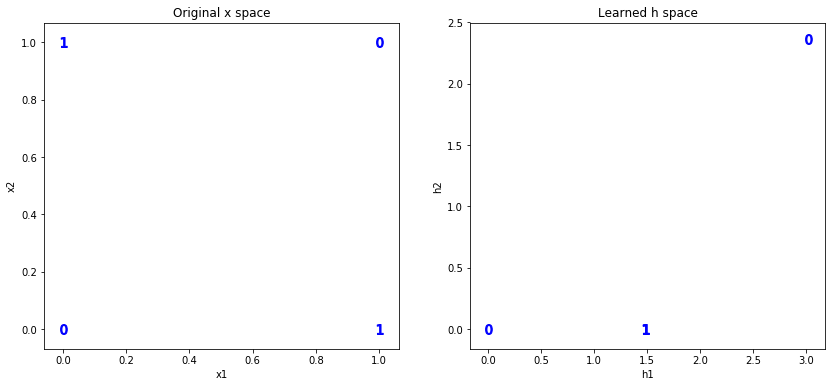

In [308]:
def extract_hidden(full_model: Module, x: np.ndarray) -> np.ndarray:
    """ Function to extraxt the hidden representation from a MLP.
    Args:
    full_model: Module. The sequential model used as a classifier
    x: np.ndarray with shape (nr_examples, nr_features). Input examples
    Returns:
    h: np.ndarray with shape (nr_examples, nr_features). Hidden representation of inputs.
    """
    # Extract the hidden features from the sequential model defined above and
    # compute the hidden representation after propagating the input through
    # the first Linear layer and the ReLU function.
    h = Sequential(*full_model.modules[:-1])
    h = h(np.expand_dims(x, -1)).reshape(4, 2)
    return h

h = extract_hidden(model, X)
plot(X[:, 0], X[:, 1], h[:, 0], h[:, 1], Y.flatten())


** Your feedback on exercise 3: ** 
- Do we have to use zero_grad function in each iteration when we try to do multiple steps? before using it we got the loss equal to zero faster after only 50 iterations or something and even when we run it multiple times it get faster to zero loss than now when we use zero_grad function after each iteration. 
